In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


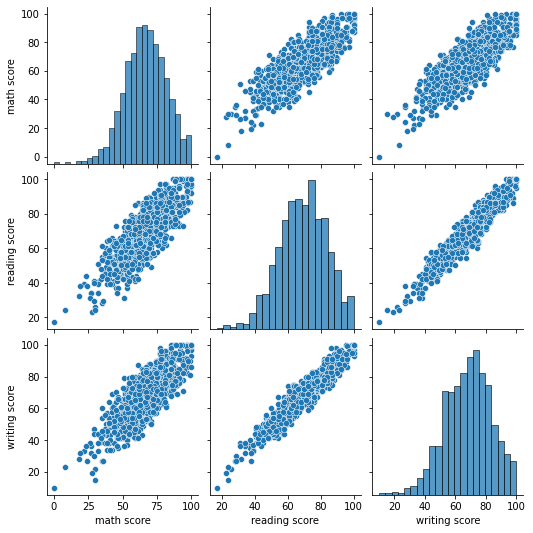

In [6]:
sns.pairplot(df)

In [7]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<AxesSubplot:>

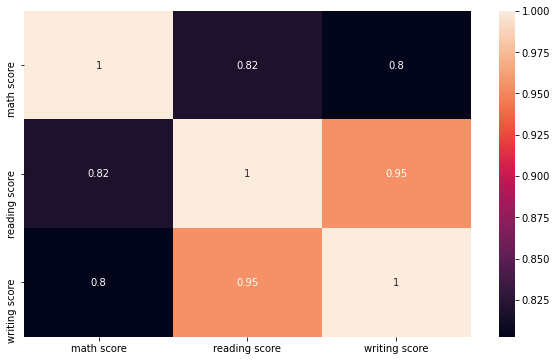

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


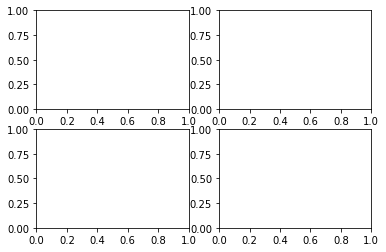

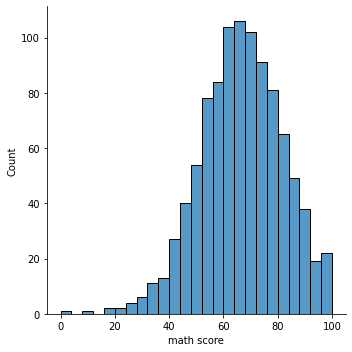

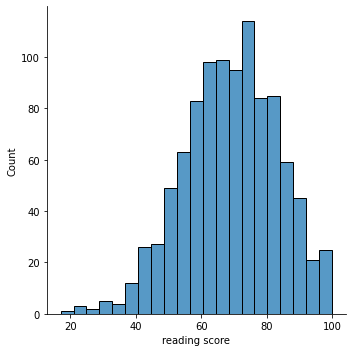

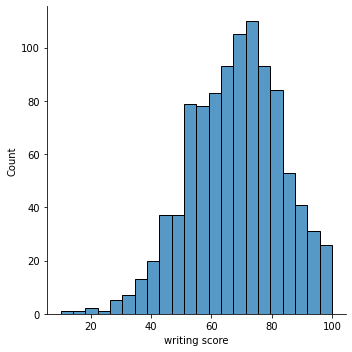

In [9]:
fig, ax = plt.subplots(2,2)
sns.displot(df['math score'],ax=ax[0,0])
sns.displot(df['reading score'],ax=ax[0,1])
sns.displot(df['writing score'],ax=ax[1,0])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

<AxesSubplot:xlabel='math score', ylabel='writing score'>

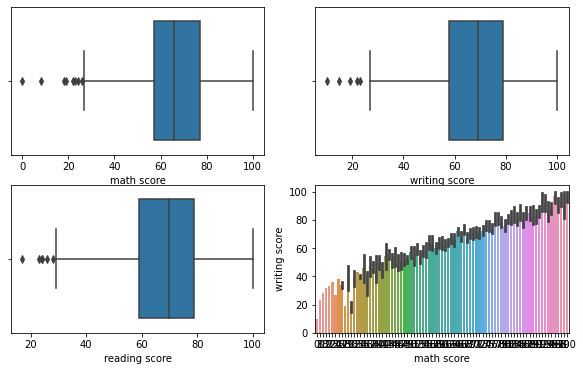

In [10]:
fig, ax = plt.subplots(2,2, figsize=(10,6))
sns.boxplot(df['math score'],ax=ax[0,0])
sns.boxplot(df['writing score'],ax=ax[0,1])
sns.boxplot(df['reading score'],ax=ax[1,0])
sns.barplot(df['math score'],df['writing score'],ax=ax[1,1])


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

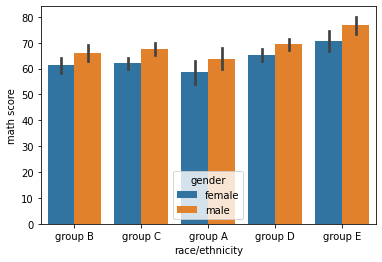

In [11]:
sns.barplot(df['race/ethnicity'],df['math score'],hue=df['gender'])

In [12]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

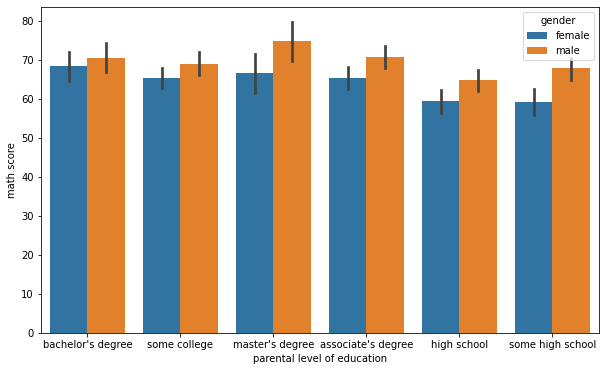

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(df['parental level of education'],df['math score'],hue=df['gender'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='race/ethnicity', ylabel='reading score'>

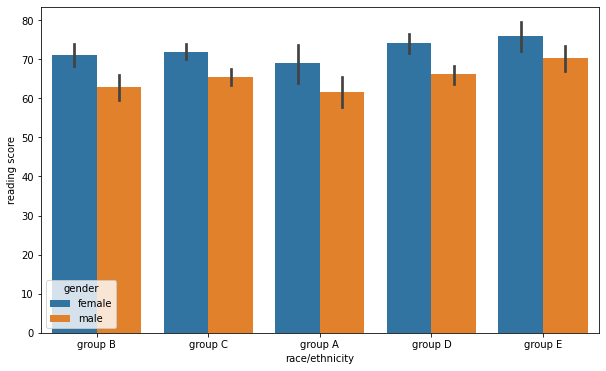

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(df['race/ethnicity'],df['reading score'],hue=df['gender'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='parental level of education', ylabel='reading score'>

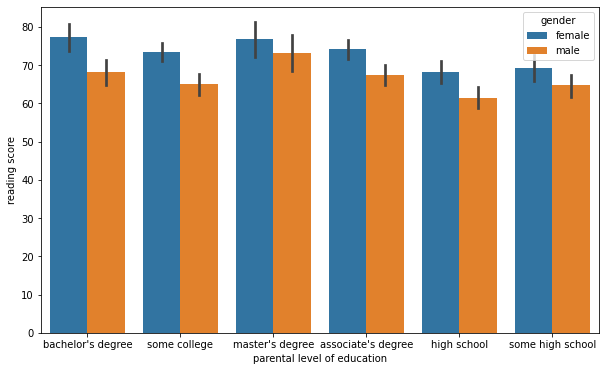

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(df['parental level of education'],df['reading score'],hue=df['gender'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='race/ethnicity', ylabel='writing score'>

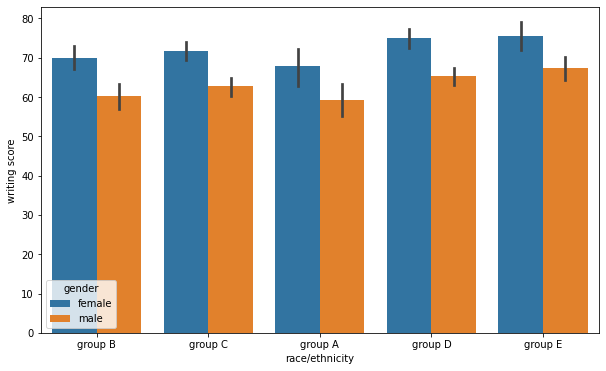

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(df['race/ethnicity'],df['writing score'],hue=df['gender'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='parental level of education', ylabel='writing score'>

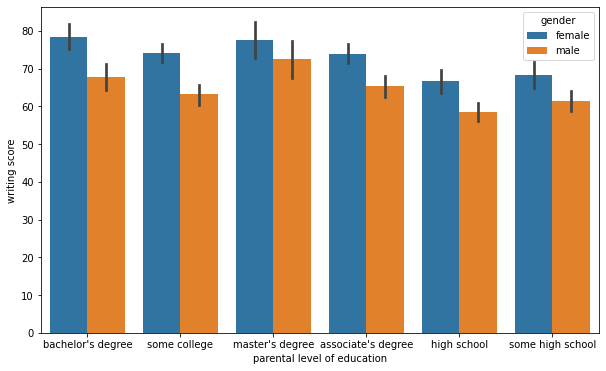

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(df['parental level of education'],df['writing score'],hue=df['gender'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

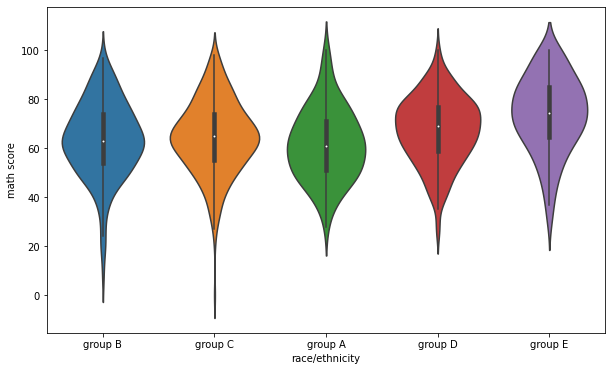

In [18]:
plt.figure(figsize=(10,6))
sns.violinplot(y=df['math score'],x=df['race/ethnicity'])

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

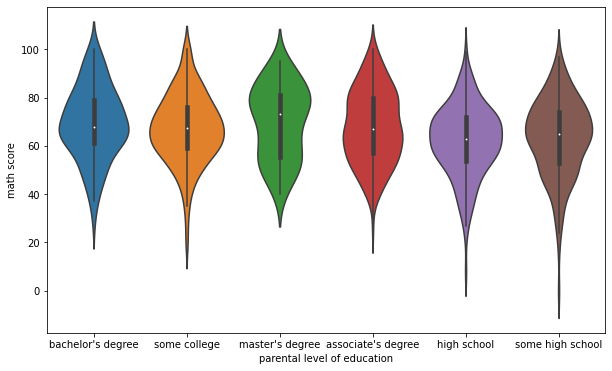

In [19]:
plt.figure(figsize=(10,6))
sns.violinplot(y=df['math score'],x=df['parental level of education'])

<AxesSubplot:xlabel='parental level of education', ylabel='reading score'>

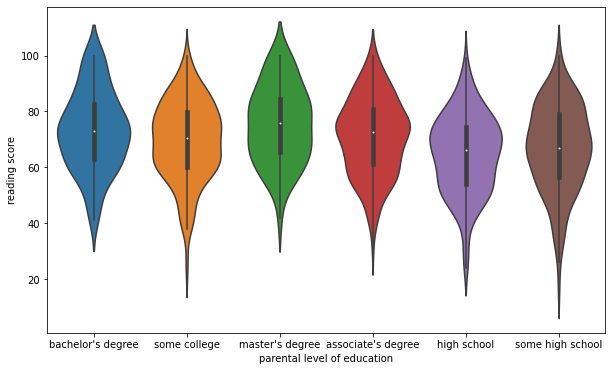

In [20]:
plt.figure(figsize=(10,6))
sns.violinplot(y=df['reading score'],x=df['parental level of education'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='reading score'>

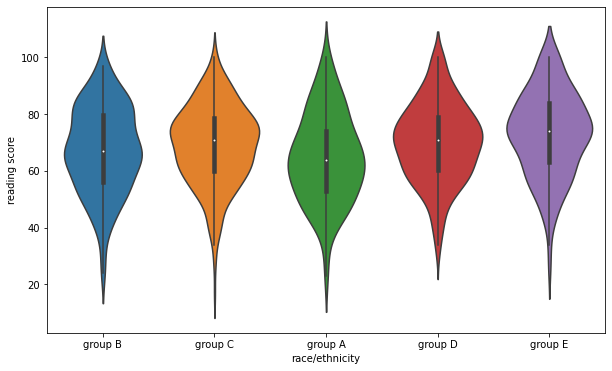

In [21]:
plt.figure(figsize=(10,6))
sns.violinplot(y=df['reading score'],x=df['race/ethnicity'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='writing score'>

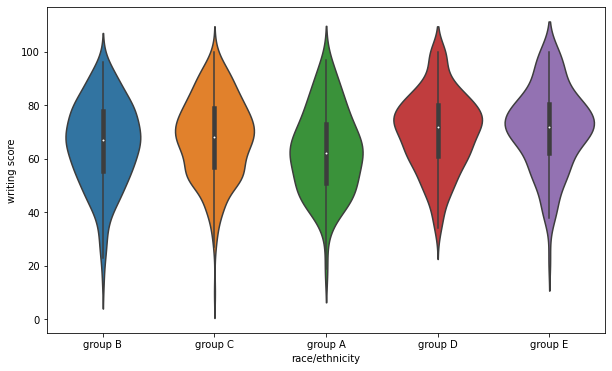

In [22]:
plt.figure(figsize=(10,6))
sns.violinplot(y=df['writing score'],x=df['race/ethnicity'])

<AxesSubplot:xlabel='parental level of education', ylabel='writing score'>

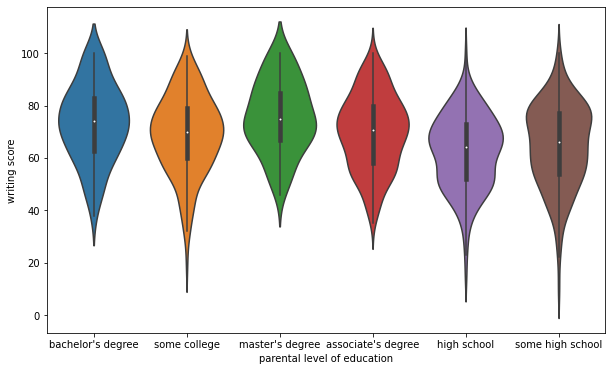

In [23]:
plt.figure(figsize=(10,6))
sns.violinplot(y=df['writing score'],x=df['parental level of education'])

<AxesSubplot:ylabel='gender'>

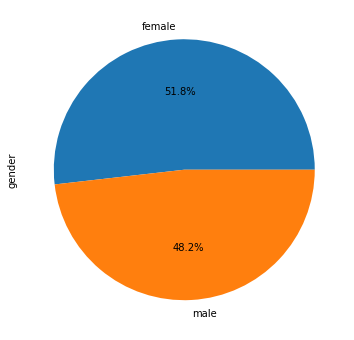

In [24]:
plt.figure(figsize=(10,6))
df['gender'].value_counts().plot.pie(autopct='%1.1F%%')

<AxesSubplot:ylabel='race/ethnicity'>

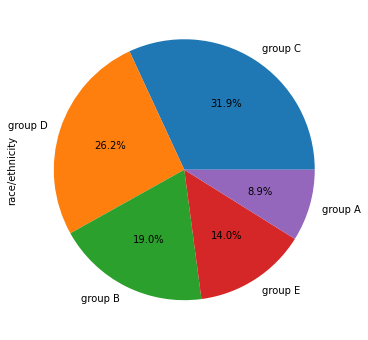

In [25]:
plt.figure(figsize=(10,6))
df['race/ethnicity'].value_counts().plot.pie(autopct='%1.1F%%')

<AxesSubplot:ylabel='parental level of education'>

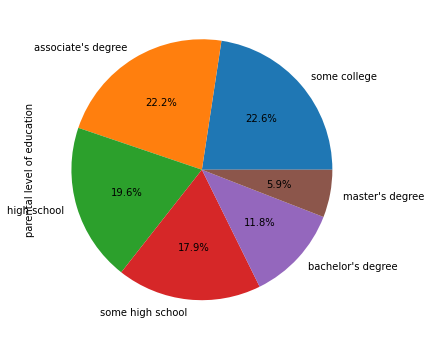

In [26]:
plt.figure(figsize=(10,6))
df['parental level of education'].value_counts().plot.pie(autopct='%1.1F%%')

<AxesSubplot:ylabel='lunch'>

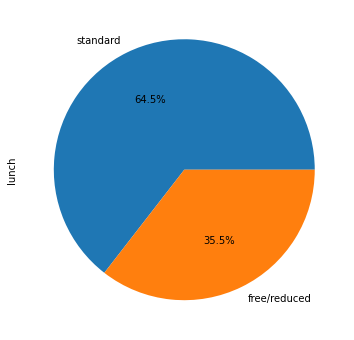

In [27]:
plt.figure(figsize=(10,6))
df['lunch'].value_counts().plot.pie(autopct='%1.1F%%')

<AxesSubplot:ylabel='test preparation course'>

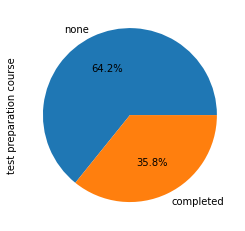

In [28]:
df['test preparation course'].value_counts().plot.pie(autopct='%1.1F%%')

In [29]:
from sklearn.preprocessing import OrdinalEncoder

In [30]:
oe = OrdinalEncoder()

In [31]:
oe = oe.fit_transform(df[['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']])

In [32]:
df[['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']] = oe

In [33]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,1.0,1.0,1.0,1.0,72,72,74
1,0.0,2.0,4.0,1.0,0.0,69,90,88
2,0.0,1.0,3.0,1.0,1.0,90,95,93
3,1.0,0.0,0.0,0.0,1.0,47,57,44
4,1.0,2.0,4.0,1.0,1.0,76,78,75
...,...,...,...,...,...,...,...,...
995,0.0,4.0,3.0,1.0,0.0,88,99,95
996,1.0,2.0,2.0,0.0,1.0,62,55,55
997,0.0,2.0,2.0,0.0,0.0,59,71,65
998,0.0,3.0,4.0,1.0,0.0,68,78,77


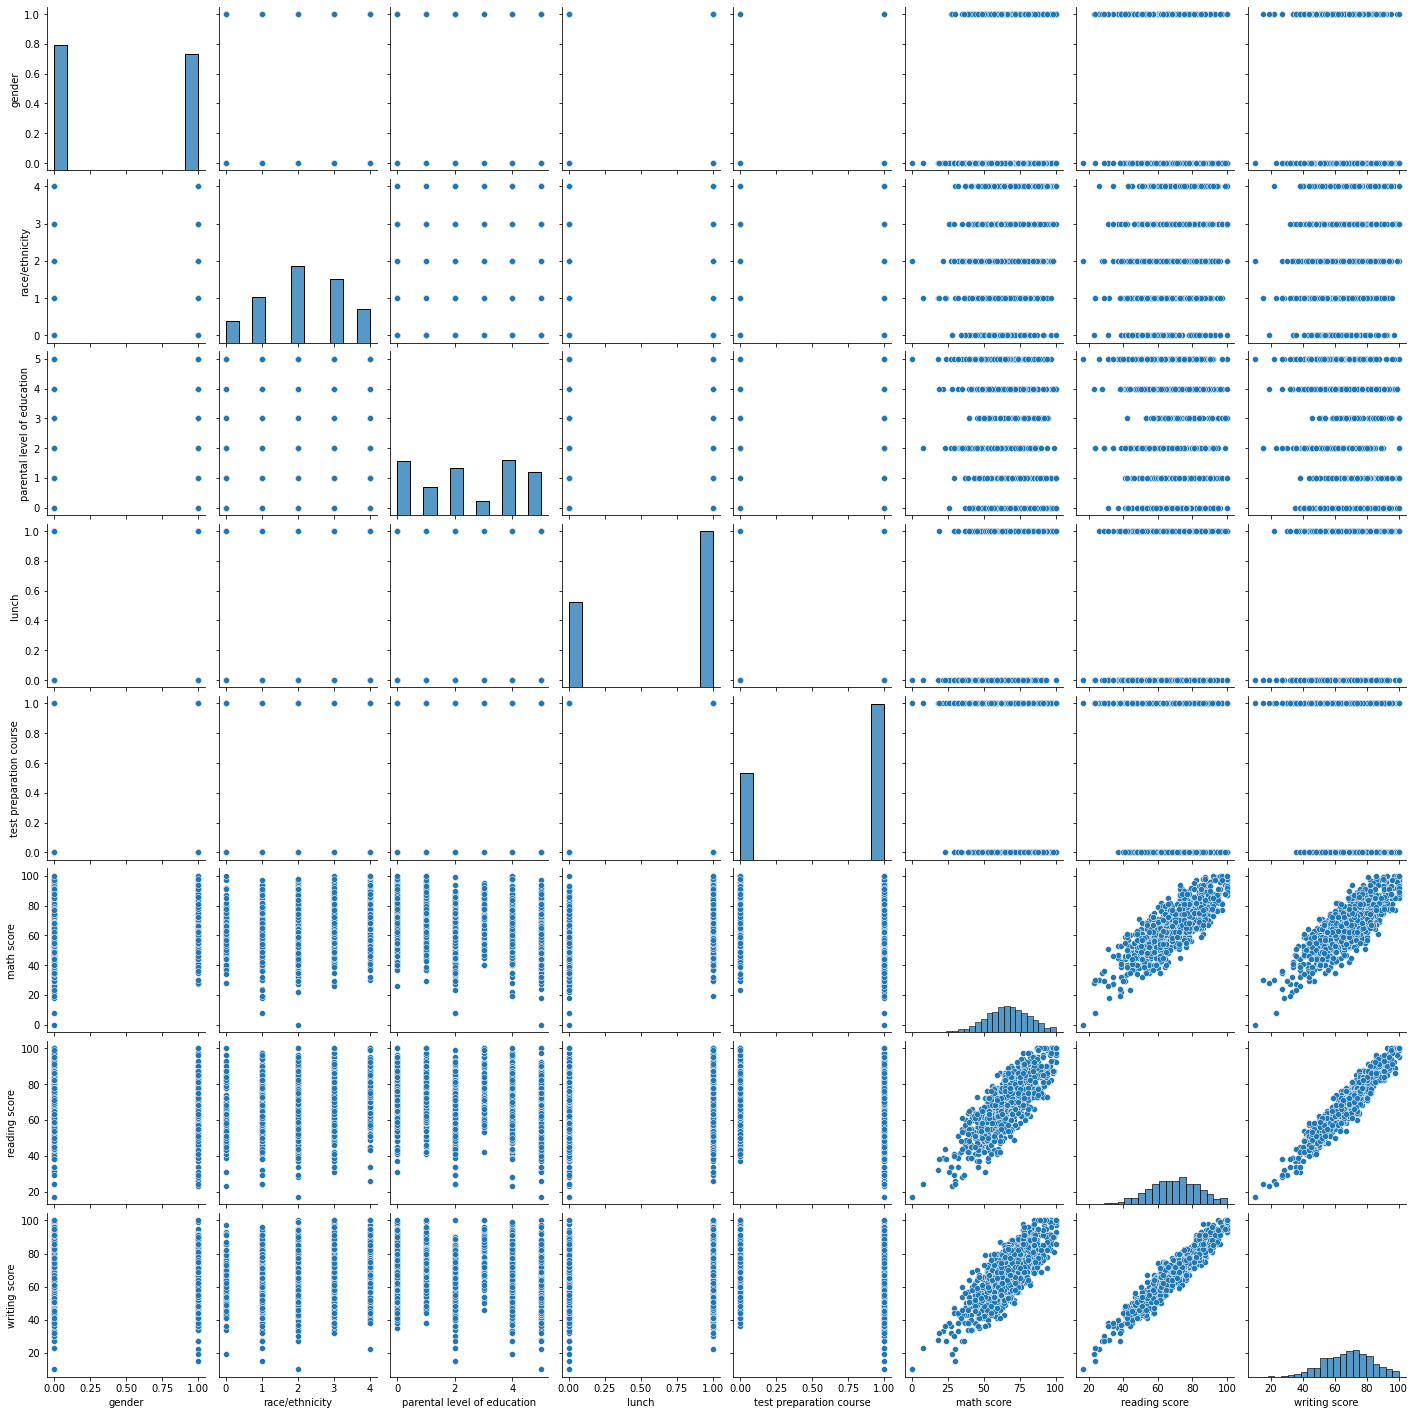

In [34]:
sns.pairplot(df)